# Failure Mode Classification using Classification Models

## Definition of Data Attributes

1. ALF = Axial Load Factor of Column
2. AS = Aspect Ration of Column
3. LRI = Longitudinal Reinforcement Index
4. TRI = Transverse Reinforcement Index
5. CS = Cross Section of Transverse Reinforcement
6. Cdratio = cover ratio of column
7. Conf = confinement detail
8. DiaSpaRatio = hoop space ratio
9. Failure = this is the type of failure that ocuured after the application of the load(Label)

## Data Preperation

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
Data = pd.read_csv('SpiralColumnData.csv')

In [7]:
Data.head()

,ALF,AS,LRI,TRI,CS,Cdratio,Conf,DiaSpaRatio,Failure
0,0.058269,0.250000,0.288738,4.134940,O,0.0404,HH,0.100000,Flexure
1,0.055590,0.250000,0.273986,3.944828,O,0.0404,HH,0.100000,Flexure
2,0.057235,0.250000,0.283612,4.452071,O,0.0404,HH,0.100000,Flexure
3,0.003360,0.183150,0.195963,12.253500,O,0.0404,HH,0.235294,Flexure
4,0.009805,0.186567,0.222450,14.011681,O,0.0432,HH,0.314286,Flexure


In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ALF          159 non-null    float64
 1   AS           159 non-null    float64
 2   LRI          159 non-null    float64
 3   TRI          159 non-null    float64
 4   CS           159 non-null    object 
 5   Cdratio      159 non-null    float64
 6   Conf         159 non-null    object 
 7   DiaSpaRatio  159 non-null    float64
 8   Failure      159 non-null    object 
dtypes: float64(6), object(3)
memory usage: 11.3+ KB


<AxesSubplot:>

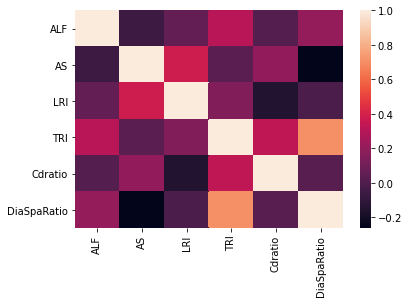

In [9]:
sns.heatmap(Data.corr())

array([[<AxesSubplot:title={'center':'ALF'}>,
        <AxesSubplot:title={'center':'AS'}>],
       [<AxesSubplot:title={'center':'LRI'}>,
        <AxesSubplot:title={'center':'TRI'}>],
       [<AxesSubplot:title={'center':'Cdratio'}>,
        <AxesSubplot:title={'center':'DiaSpaRatio'}>]], dtype=object)

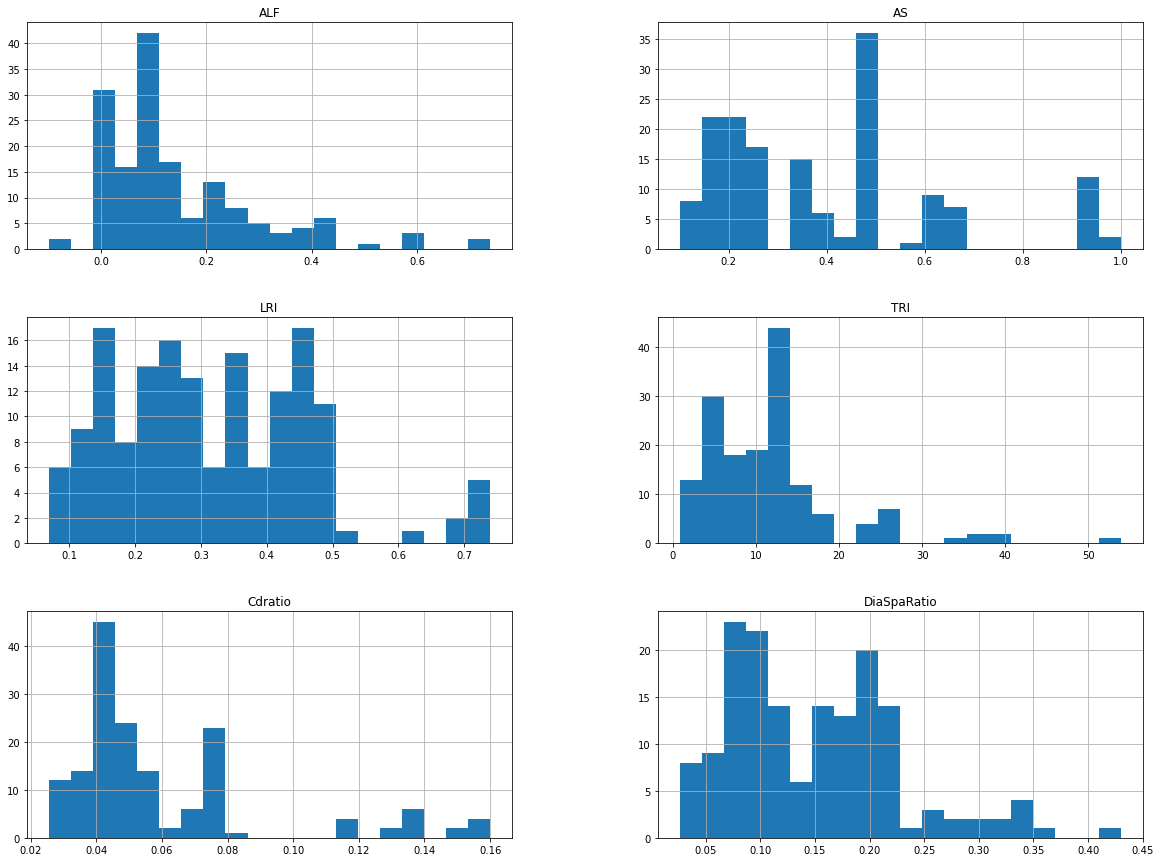

In [10]:
Data.hist(bins=20, figsize=(20,15))

In [11]:
Data.describe()

,ALF,AS,LRI,TRI,Cdratio,DiaSpaRatio
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.144228,0.401036,0.315738,11.619807,0.059574,0.148661
std,0.149461,0.228076,0.149127,8.166316,0.031157,0.076315
min,-0.098561,0.100000,0.069260,0.833333,0.025591,0.026254
25%,0.047751,0.219178,0.201579,5.807946,0.041798,0.087449
50%,0.101345,0.333333,0.287862,11.418280,0.047541,0.141509
75%,0.203894,0.500000,0.426598,13.701935,0.072727,0.200000
max,0.738345,1.000000,0.739444,53.898679,0.160000,0.430000


In [12]:
data  = pd.DataFrame(Data.Failure.value_counts())
data

,Failure
Flexure,99
Flexure-shear,32
Shear,28


array([<AxesSubplot:ylabel='Failure'>], dtype=object)

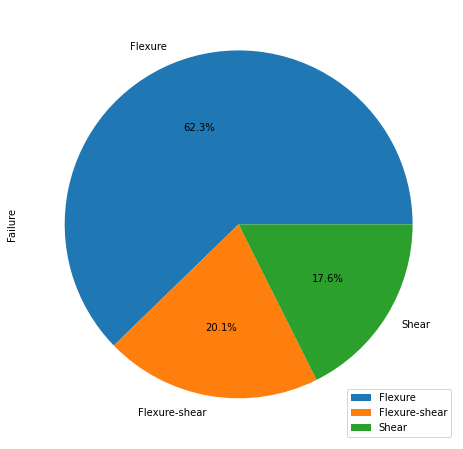

In [13]:
data.plot.pie(autopct="%.1f%%", subplots=True, figsize=(10,8))

In [14]:
Data.isnull().sum()

ALF            0
AS             0
LRI            0
TRI            0
CS             0
Cdratio        0
Conf           0
DiaSpaRatio    0
Failure        0
dtype: int64

In [15]:
x = Data.drop('Failure', axis=1)
y = Data['Failure']

In [16]:
x = pd.get_dummies(x, drop_first=True)
x

,ALF,AS,LRI,TRI,Cdratio,DiaSpaRatio,CS_O,CS_S,Conf_CFB,Conf_DC,Conf_DE,Conf_HH
0,0.058269,0.250000,0.288738,4.134940,0.040400,0.100000,1,0,0,0,0,1
1,0.055590,0.250000,0.273986,3.944828,0.040400,0.100000,1,0,0,0,0,1
2,0.057235,0.250000,0.283612,4.452071,0.040400,0.100000,1,0,0,0,0,1
3,0.003360,0.183150,0.195963,12.253500,0.040400,0.235294,1,0,0,0,0,1
4,0.009805,0.186567,0.222450,14.011681,0.043200,0.314286,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
154,0.000000,0.387860,0.151538,5.078814,0.025591,0.070866,0,0,0,0,0,0
155,0.000000,0.219178,0.150687,10.294803,0.036909,0.141509,0,0,0,0,0,0
156,0.002161,0.500000,0.207195,0.872483,0.030512,0.048228,0,0,0,0,0,0
157,0.002403,0.500000,0.230388,0.970149,0.030512,0.048228,0,0,0,0,0,0


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2)

## KNN Algorithm

In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [19]:
y_pred = classifier.predict(x_test)
print(y_pred)

['Flexure' 'Shear' 'Flexure' 'Flexure' 'Flexure' 'Flexure' 'Flexure'
 'Shear' 'Flexure-shear' 'Flexure' 'Flexure' 'Flexure' 'Flexure-shear'
 'Shear' 'Flexure' 'Flexure-shear' 'Flexure' 'Flexure' 'Flexure' 'Flexure'
 'Flexure-shear' 'Flexure' 'Flexure' 'Flexure' 'Shear' 'Flexure' 'Flexure'
 'Flexure' 'Flexure' 'Flexure' 'Flexure' 'Flexure']


## Decision Trees Algorithm

In [20]:
from sklearn import tree
rec = tree.DecisionTreeClassifier(max_depth = 5)
recColumn_model = rec.fit(x_train, y_train)

[Text(345.2625, 996.6, 'X[1] <= 0.337\ngini = 0.535\nsamples = 127\nvalue = [80, 24, 23]'),
 Text(303.4125, 815.4000000000001, 'gini = 0.0\nsamples = 67\nvalue = [67, 0, 0]'),
 Text(387.1125, 815.4000000000001, 'X[2] <= 0.392\ngini = 0.646\nsamples = 60\nvalue = [13, 24, 23]'),
 Text(167.4, 634.2, 'X[0] <= 0.157\ngini = 0.531\nsamples = 25\nvalue = [8, 15, 2]'),
 Text(83.7, 453.0, 'X[3] <= 1.433\ngini = 0.219\nsamples = 16\nvalue = [0, 14, 2]'),
 Text(41.85, 271.79999999999995, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(125.55000000000001, 271.79999999999995, 'gini = 0.0\nsamples = 14\nvalue = [0, 14, 0]'),
 Text(251.10000000000002, 453.0, 'X[1] <= 0.751\ngini = 0.198\nsamples = 9\nvalue = [8, 1, 0]'),
 Text(209.25, 271.79999999999995, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0]'),
 Text(292.95, 271.79999999999995, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(606.825, 634.2, 'X[1] <= 0.537\ngini = 0.553\nsamples = 35\nvalue = [5, 9, 21]'),
 Text(460.35, 453.0, 'X[3] <

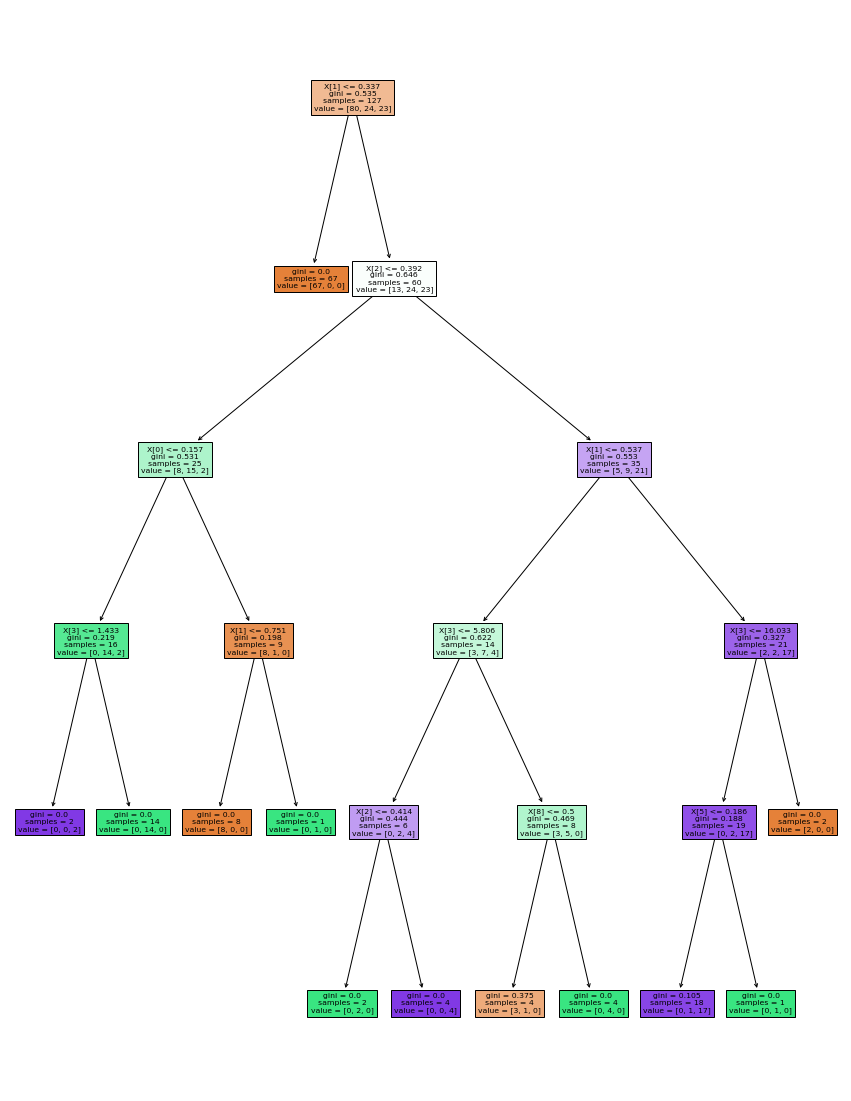

In [21]:
plt.figure(figsize = (15,20))
tree.plot_tree(recColumn_model,filled = True)

## Support Vector Machine Algorithm

In [22]:
from sklearn import svm
cls = svm.SVC(kernel="linear")
cls.fit(x_train,y_train)
pred = cls.predict(x_test)
print(pred)

['Flexure-shear' 'Flexure-shear' 'Flexure-shear' 'Flexure' 'Flexure'
 'Flexure' 'Flexure' 'Flexure-shear' 'Flexure-shear' 'Flexure' 'Flexure'
 'Flexure' 'Flexure' 'Shear' 'Flexure' 'Flexure-shear' 'Flexure' 'Flexure'
 'Flexure' 'Flexure' 'Shear' 'Flexure-shear' 'Flexure' 'Flexure-shear'
 'Shear' 'Flexure' 'Flexure' 'Shear' 'Flexure-shear' 'Flexure' 'Flexure'
 'Flexure']


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2)

## Multnomial Logistic Regression Algorithm

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 1000 )
model.fit(x_train,y_train)
model_pred = model.predict(x_test)
print(model_pred)

['Flexure' 'Flexure' 'Flexure' 'Flexure' 'Shear' 'Flexure' 'Flexure'
 'Flexure-shear' 'Flexure-shear' 'Flexure' 'Flexure-shear' 'Flexure'
 'Flexure' 'Flexure' 'Flexure' 'Flexure' 'Flexure' 'Flexure' 'Flexure'
 'Flexure' 'Shear' 'Flexure' 'Shear' 'Flexure' 'Flexure' 'Flexure'
 'Flexure-shear' 'Flexure-shear' 'Flexure' 'Flexure' 'Shear' 'Shear']


## Random Forest Algorithm

In [25]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, bootstrap=True, max_features='sqrt' )
model.fit(x_train,y_train)
model_pred = model.predict(x_test)
print(model_pred)

['Flexure' 'Flexure' 'Flexure' 'Flexure' 'Shear' 'Flexure' 'Shear'
 'Flexure-shear' 'Shear' 'Flexure' 'Flexure-shear' 'Flexure-shear'
 'Flexure' 'Flexure' 'Flexure' 'Flexure' 'Flexure' 'Flexure' 'Flexure'
 'Flexure' 'Shear' 'Flexure' 'Shear' 'Flexure' 'Flexure' 'Flexure'
 'Flexure-shear' 'Flexure-shear' 'Flexure' 'Flexure' 'Shear' 'Shear']


# HyperParameter Tuning

In [45]:
model_parameters = {
    'Forest':{ 'model':
               RandomForestClassifier(),
              'params': {
                  'n_estimators': [10, 100, 1000]
              }
        
    },
    'Regression':{ 'model':
                  LogisticRegression( max_iter= 1000 ),
                  'params': {
                      'solver': ['lbfgs'],
                      
                                        }
        
    },
    'svm': { 'model':
               svm.SVC(gamma = 'scale'),
              'params': {
                  'kernel': ['rbf','linear']
              }
    },
    'KNN': { 'model':
               KNeighborsClassifier(n_neighbors=5),
             'params': {
        
        }   
    },
      'Tree': {'model':
            tree.DecisionTreeClassifier(),
    'params': {
        'max_depth':[2,5,10]
        } 
              }       
}

In [46]:
scores = []
from sklearn.model_selection import GridSearchCV
for model_name, mp in model_parameters.items():
    model = GridSearchCV(mp['model'], mp['params'], cv =5,return_train_score = False)
    model.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': column.best_score_,
        'best_params': column.best_params_
        
    })
df = pd.DataFrame(scores, columns = ['model', 'best_score','best_params' ])  
df

,model,best_score,best_params
0,Forest,0.764,{'kernel': 'linear'}
1,Regression,0.764,{'kernel': 'linear'}
2,svm,0.764,{'kernel': 'linear'}
3,KNN,0.764,{'kernel': 'linear'}
4,Tree,0.764,{'kernel': 'linear'}
